In [1]:
# Importação das bibliotecas necessárias
# Conexão e Dados
import pymongo  # Biblioteca para conectar e interagir com o banco de dados MongoDB
import pandas as pd  # Biblioteca para manipulação de dados em formato tabular (DataFrame)

# Modelagem e Avaliação
from sklearn.model_selection import train_test_split  # Função para dividir os dados em treino e teste
from sklearn.linear_model import LinearRegression  # Modelo de regressão linear para aprendizado de máquina
from sklearn.metrics import mean_squared_error, r2_score # Para avaliação do modelo (RMSE e R²)

# Visualização
import matplotlib.pyplot as plt # Para gerar gráficos
import seaborn as sns # Para visualizações estatísticas (complementa o matplotlib)

In [2]:
# Conectar ao MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017/") # Conexão com o MongoDB local 
db = client["startup"] # Acessa o banco de dados "startup"
collection = db["funcionarios"] # Acessa a coleção "funcionarios" 

# Buscar os dados do MongoDB (apenas idade e salario, excluindo _id)
data = list(collection.find({}, {"_id": 0, "idade": 1, "salario": 1}))

# Converter os dados para um DataFrame do Pandas
df = pd.DataFrame(data) 

# Exibir as primeiras linhas para verificação
print("Pré-visualização dos Dados:")
print(df.head())

Pré-visualização dos Dados:
   idade  salario
0     57    12000
1     67    12000
2     46    12000
3     80    12000
4     63    12000


In [3]:
print("### Análise Exploratória de Dados (EDA) e Estatísticas Descritivas ###")

# Estatísticas Descritivas (Média, Mediana, Desvio Padrão)
print("\nEstatísticas Descritivas:")
print(df.describe().round(2))

# Verificação de Valores Ausentes
print("\nVerificação de Valores Ausentes:")
print(df.isnull().sum())

# Verificação de Inconsistências (Duplicatas)
print("\nVerificação de Duplicatas:")
print(f"Total de linhas duplicadas: {df.duplicated().sum()}")

### Análise Exploratória de Dados (EDA) e Estatísticas Descritivas ###

Estatísticas Descritivas:
       idade   salario
count  20.00     20.00
mean   50.70  11500.00
std    15.16   1538.97
min    25.00   7000.00
25%    41.25  12000.00
50%    49.00  12000.00
75%    61.50  12000.00
max    80.00  12000.00

Verificação de Valores Ausentes:
idade      0
salario    0
dtype: int64

Verificação de Duplicatas:
Total de linhas duplicadas: 4


In [4]:
# Preparação dos dados
X = df[["idade"]]  # Variável independente (previsora) 
y = df["salario"]  # Variável dependente (valor a prever) 

# Dividimos os dados em conjunto de treino (80%) e conjunto de teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Criamos e Treinamos o modelo de regressão linear
model = LinearRegression() 
model.fit(X_train, y_train) 

print(f"Modelo treinado com {len(X_train)} amostras de treino.")

Modelo treinado com 16 amostras de treino.


In [5]:
# Realizamos a predição no conjunto de TESTE para avaliação
y_pred = model.predict(X_test)

print("### Avaliação do Modelo de Regressão Linear ###")

# Coeficientes
print(f"Coeficiente (Inclinação): {model.coef_[0]:.4f}")
print(f"Intercepto: R$ {model.intercept_:.2f}")

# Métricas de Erro
# 1. Calculamos o MSE (Mean Squared Error) primeiro
mse = mean_squared_error(y_test, y_pred) 

# 2. Agora, calculamos o RMSE tirando a raiz quadrada do MSE
rmse = mse ** 0.5  # (mse elevado a 0.5)

r2 = r2_score(y_test, y_pred) # Coeficiente de Determinação R²

print(f"\nErro Quadrático Médio (MSE): R$ {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): R$ {rmse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

### Avaliação do Modelo de Regressão Linear ###
Coeficiente (Inclinação): 41.0654
Intercepto: R$ 9562.37

Erro Quadrático Médio (MSE): R$ 3841640.05
Raiz do Erro Quadrático Médio (RMSE): R$ 1960.01
Coeficiente de Determinação (R²): 0.1805


In [6]:
print("### Previsões de Salário para Idades Específicas ###")

# Idades para prever (30, 40, 50 anos, etc.)
idades_para_prever = pd.DataFrame({'idade': [30, 40, 50, 65]})

# Previsão
salarios_preditos = model.predict(idades_para_prever) 

# Exibir os resultados
for idade, salario in zip(idades_para_prever['idade'], salarios_preditos):
    print(f"Salário estimado para {idade} anos: R$ {salario:.2f}") 

### Previsões de Salário para Idades Específicas ###
Salário estimado para 30 anos: R$ 10794.33
Salário estimado para 40 anos: R$ 11204.98
Salário estimado para 50 anos: R$ 11615.64
Salário estimado para 65 anos: R$ 12231.62


### Gerando Gráficos de Visualização da Regressão ###


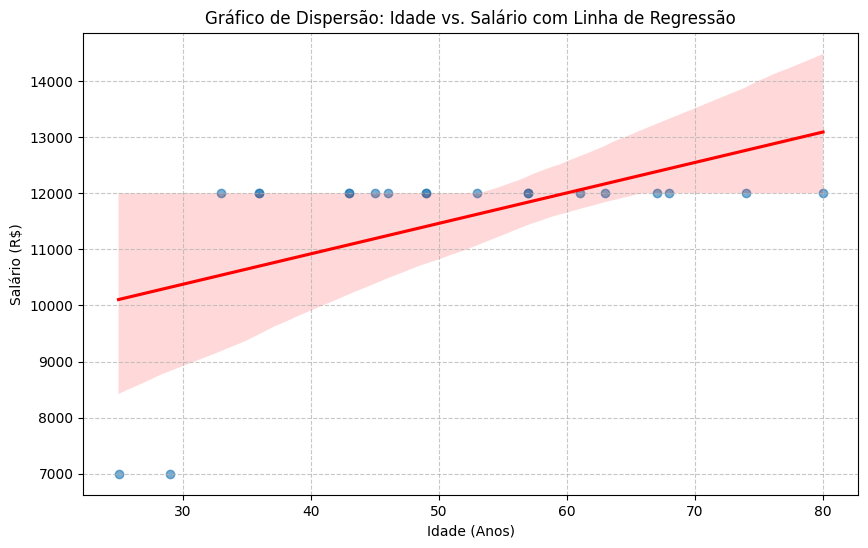

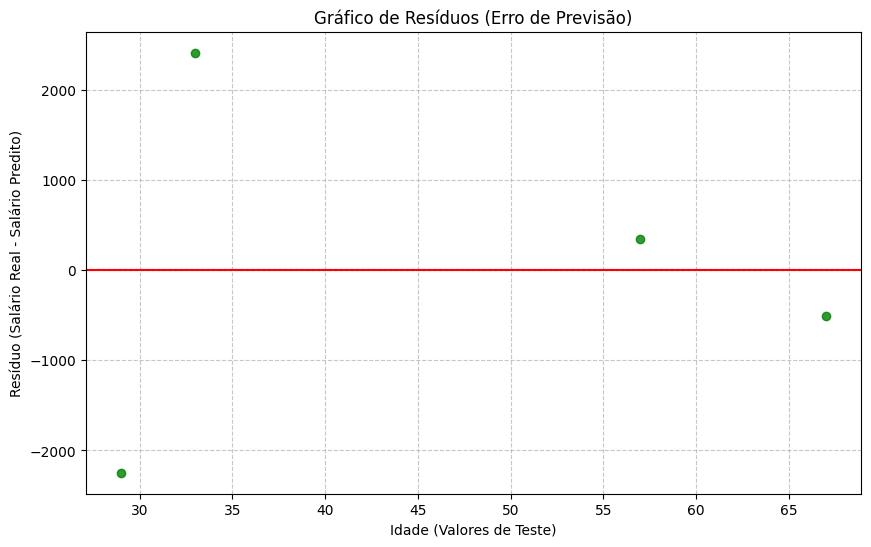

In [7]:
print("### Gerando Gráficos de Visualização da Regressão ###")

# Gráfico 1: Gráfico de Dispersão com Linha de Regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='idade', y='salario', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Gráfico de Dispersão: Idade vs. Salário com Linha de Regressão')
plt.xlabel('Idade (Anos)')
plt.ylabel('Salário (R$)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Gráfico 2: Resíduos do Modelo (Análise de erro)
plt.figure(figsize=(10, 6))
sns.residplot(x=X_test['idade'], y=y_test - y_pred, color='green')
plt.title('Gráfico de Resíduos (Erro de Previsão)')
plt.xlabel('Idade (Valores de Teste)')
plt.ylabel('Resíduo (Salário Real - Salário Predito)')
plt.axhline(y=0, color='red', linestyle='-')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Explorando Novo Insight: Distribuição de Salários ###


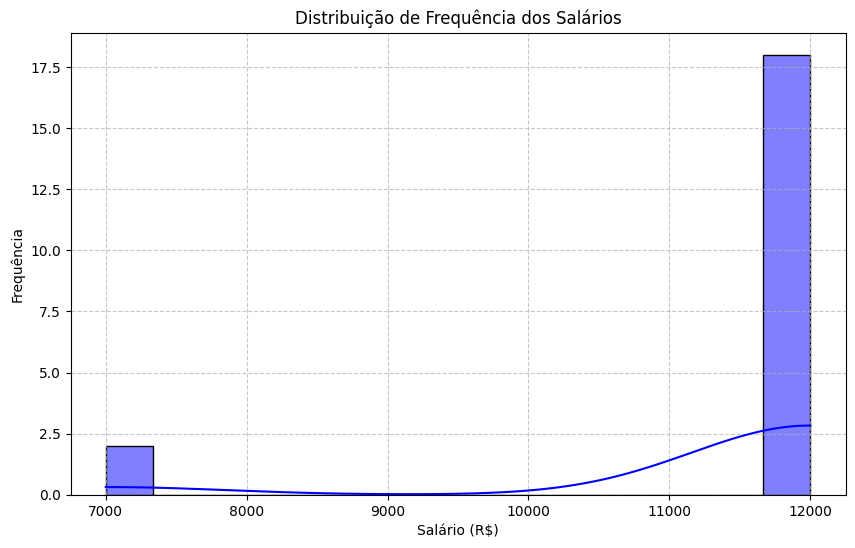

In [8]:
print("### Explorando Novo Insight: Distribuição de Salários ###")

# Gráfico 3: Distribuição de Frequência dos Salários
plt.figure(figsize=(10, 6))
sns.histplot(df['salario'], kde=True, bins=15, color='blue')
plt.title('Distribuição de Frequência dos Salários')
plt.xlabel('Salário (R$)')
plt.ylabel('Frequência')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




--- Calculando Estatísticas do Salário ---
Média Salarial:     R$ 11500.00
Mediana Salarial:   R$ 12000.00 (O valor do meio)
Moda Salarial:      R$ 12000.00 (O valor mais frequente)

--- Gerando gráfico de distribuição (Histograma) ---
Análise concluída.


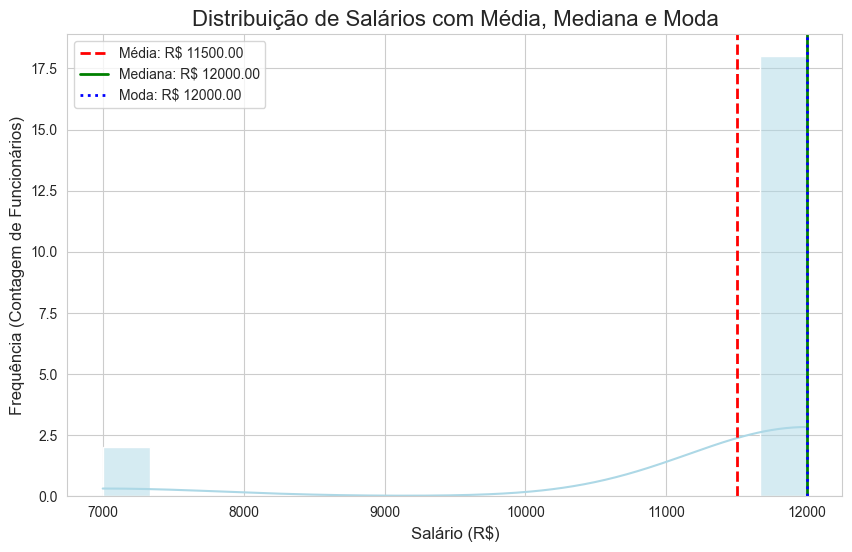

In [9]:
# ---  Cálculo das Medidas de Tendência Central (para 'salario') ---
print("\n--- Calculando Estatísticas do Salário ---")

salario_mean = df['salario'].mean()
salario_median = df['salario'].median()
# .mode() retorna uma Série (pode haver mais de uma moda). Pegamos a primeira [0].
salario_mode = df['salario'].mode()[0] 

print(f"Média Salarial:     R$ {salario_mean:.2f}")
print(f"Mediana Salarial:   R$ {salario_median:.2f} (O valor do meio)")
print(f"Moda Salarial:      R$ {salario_mode:.2f} (O valor mais frequente)")

# --- 4. Geração do Gráfico de Distribuição ---
print("\n--- Gerando gráfico de distribuição (Histograma) ---")

# Configura o estilo do gráfico
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) # Define um bom tamanho para a imagem

# Criar o Histograma (gráfico de distribuição)
# kde=True adiciona uma linha suave de estimativa da distribuição
sns.histplot(df['salario'], kde=True, bins=15, color='lightblue')

# Adicionar as linhas verticais para Média, Mediana e Moda
plt.axvline(salario_mean, color='red', linestyle='--', linewidth=2, label=f'Média: R$ {salario_mean:.2f}')
plt.axvline(salario_median, color='green', linestyle='-', linewidth=2, label=f'Mediana: R$ {salario_median:.2f}')
plt.axvline(salario_mode, color='blue', linestyle=':', linewidth=2, label=f'Moda: R$ {salario_mode:.2f}')

# Adicionar Títulos e Legendas
plt.title('Distribuição de Salários com Média, Mediana e Moda', fontsize=16)
plt.xlabel('Salário (R$)', fontsize=12)
plt.ylabel('Frequência (Contagem de Funcionários)', fontsize=12)
plt.legend() # Mostra a legenda com os valores



print("Análise concluída.")